In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("mall.csv")
df.head(5)

,INCOME,SPEND
0,233,150
1,250,187
2,204,172
3,236,178
4,354,163


In [3]:
df.dtypes

INCOME    int64
SPEND     int64
dtype: object

In [4]:
#to check null values
df.isnull().sum()

INCOME    0
SPEND     0
dtype: int64

In [5]:
df.shape

(303, 2)

In [6]:
#given inputs and spend and unlabelled data means unsupervised learning algorithm

In [7]:
df[df.duplicated()]

,INCOME,SPEND
118,204,172
164,175,173
228,288,159
230,243,152
261,230,160
265,212,132
270,249,144


In [8]:
#TO remove duplicate rows permanently
df.drop_duplicates(inplace=True)

In [9]:
#recheck
df[df.duplicated()]

,INCOME,SPEND


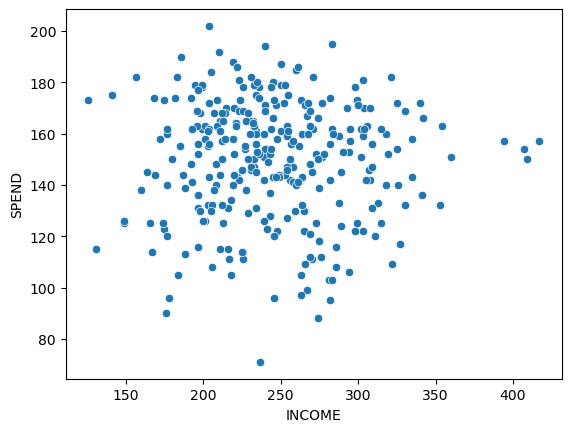

In [10]:
#visualise in scatter plt between income and spend
X1=df['INCOME']#INPUT 1
X2=df['SPEND']#INPUT 2
#plt.scatter(X1,X2)
sns.scatterplot(data=df,x=X1,y=X2)
plt.show()

In [11]:
#to copy data from dataframe to another  new dataframe, use inbuilt method copy()
df_copy=df.copy()

In [12]:
df_copy.head()

,INCOME,SPEND
0,233,150
1,250,187
2,204,172
3,236,178
4,354,163


In [13]:
#apply scaling on df_copy
#APply Standard Scaler
from sklearn.preprocessing import StandardScaler
#create object of StandardScaler class
ss=StandardScaler()
df_copy=ss.fit_transform(df_copy)
df_copy

array([[-0.26035663,  0.02186759],
       [ 0.08910044,  1.62920884],
       [-0.8564893 ,  0.97758401],
       [-0.19868774,  1.23823394],
       [ 2.22695551,  0.58660911],
       [-1.10316488, -0.06501572],
       [ 0.99357759,  0.15219256],
       [ 0.35633233,  1.02102567],
       [-0.95927079,  0.54316746],
       [-1.59651605,  1.06446732],
       [-0.13701884,  0.45628415],
       [ 0.60300791, -0.45599062],
       [ 0.41800122,  0.93414236],
       [-0.71259521, -0.23878234],
       [ 0.7674583 ,  0.54316746],
       [-0.54814482,  0.36940083],
       [ 1.93916733,  0.97758401],
       [-0.40425073, -1.54203201],
       [ 0.02743155,  0.93414236],
       [-0.13701884,  0.06530925],
       [-0.23980034,  0.4997258 ],
       [-0.26035663,  1.2816756 ],
       [-0.40425073,  1.23823394],
       [-0.05479365, -0.54287393],
       [-0.95927079,  1.23823394],
       [ 1.15802798,  0.54316746],
       [-0.69203891,  0.32595918],
       [-1.45262196, -1.15105711],
       [ 3.52200233,

In [14]:
#How many cluster or patterns or how many pattern of customers in given dataset
#use ELBOW Methods
#inbuilt class Kmeans inbuilt inner class---> define in outer class --> sklearn
from sklearn.cluster import KMeans
#to declare empty list for sum of squared error
SSE=[]
#to declare empty list for k(no of clusters)
K=[]
for i in range(1,31):
    #create object of KMeans class
    km=KMeans(n_clusters=i)
    #train the model with data, use inbuilt method fit() of KMeans class
    km.fit(df_copy)
    #sum of squarred error for each value of k means i and  hold those errors on list SSE
    #inbuilt attribute for finding sum of squared error  : inertia_
    #inertia_ inbuilt attributes of KMeans class
    SSE.append(km.inertia_)
    #to add the vaue of i (means vlue of k) in list K
    K.append(i)

In [15]:
SSE

[591.9999999999999,
 391.3154969405853,
 247.40654134487212,
 193.79453719695715,
 152.2685596926297,
 128.32554663250323,
 112.38657610703574,
 99.94815373771057,
 87.54399574178632,
 78.62965674751005,
 70.59770975232166,
 65.20971689350598,
 60.57996262761054,
 56.82428334355132,
 51.03792223275606,
 48.34313145833248,
 44.92710404696258,
 41.917451066505556,
 39.03857480307223,
 36.35176419007687,
 34.66355252093296,
 32.29642599217588,
 31.071592088318315,
 28.361738223822915,
 28.199495722790648,
 26.340514580516054,
 25.404643850986815,
 23.366542341976682,
 22.11426646174805,
 21.46917337276146]

In [16]:
dict={'value of k':K,'SSE':SSE}
df1=pd.DataFrame(dict)
df1

,value of k,SSE
0,1,592.000000
1,2,391.315497
2,3,247.406541
3,4,193.794537
4,5,152.268560
5,6,128.325547
6,7,112.386576
7,8,99.948154
8,9,87.543996
9,10,78.629657


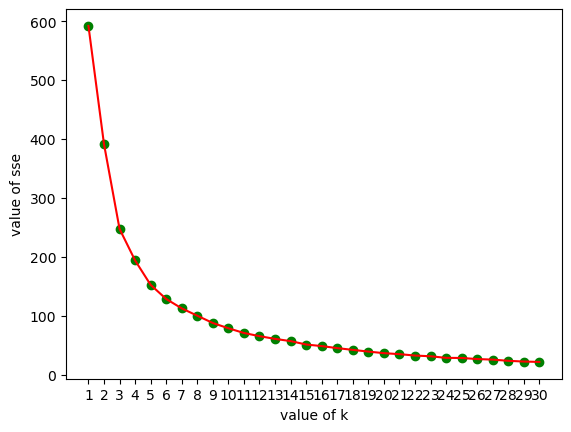

In [17]:
#plot scatter and lineplot between input K and output SSE
plt.scatter(K,SSE,c='green')
plt.plot(K,SSE,c='red')
plt.xlabel('value of k')
plt.ylabel('value of sse')
plt.xticks(K)
plt.show()

In [18]:
#decide with help of visualisation k =5

In [19]:
#05/07/2023

In [20]:
df_copy

array([[-0.26035663,  0.02186759],
       [ 0.08910044,  1.62920884],
       [-0.8564893 ,  0.97758401],
       [-0.19868774,  1.23823394],
       [ 2.22695551,  0.58660911],
       [-1.10316488, -0.06501572],
       [ 0.99357759,  0.15219256],
       [ 0.35633233,  1.02102567],
       [-0.95927079,  0.54316746],
       [-1.59651605,  1.06446732],
       [-0.13701884,  0.45628415],
       [ 0.60300791, -0.45599062],
       [ 0.41800122,  0.93414236],
       [-0.71259521, -0.23878234],
       [ 0.7674583 ,  0.54316746],
       [-0.54814482,  0.36940083],
       [ 1.93916733,  0.97758401],
       [-0.40425073, -1.54203201],
       [ 0.02743155,  0.93414236],
       [-0.13701884,  0.06530925],
       [-0.23980034,  0.4997258 ],
       [-0.26035663,  1.2816756 ],
       [-0.40425073,  1.23823394],
       [-0.05479365, -0.54287393],
       [-0.95927079,  1.23823394],
       [ 1.15802798,  0.54316746],
       [-0.69203891,  0.32595918],
       [-1.45262196, -1.15105711],
       [ 3.52200233,

In [21]:
#here clearly show no of cluster means parameter n_clusters = 5
#Again create object of KMeans class
km=KMeans(n_clusters = 5, random_state=1)

In [22]:
#train the model with given dataset, use inbuilt method fit_predict() of KM class
#fit() means train the model and predict()  : allot the catagory or target to each rows
Y_pred=km.fit_predict(df_copy)

In [23]:
Y_pred

array([1, 4, 4, 4, 0, 2, 0, 1, 4, 4, 1, 1, 1, 2, 0, 4, 0, 2, 4, 1, 1, 4,
       4, 1, 4, 0, 4, 2, 0, 4, 4, 2, 4, 1, 2, 4, 0, 4, 1, 0, 0, 4, 1, 1,
       0, 0, 4, 1, 2, 1, 1, 0, 1, 4, 4, 4, 4, 4, 4, 0, 3, 0, 4, 2, 4, 4,
       1, 4, 4, 4, 1, 1, 4, 4, 4, 1, 1, 4, 4, 1, 4, 0, 0, 0, 3, 1, 1, 4,
       4, 3, 4, 4, 4, 0, 2, 2, 0, 1, 0, 4, 4, 1, 4, 4, 4, 2, 2, 1, 1, 1,
       0, 4, 0, 4, 1, 4, 4, 4, 1, 3, 4, 1, 1, 4, 4, 2, 1, 4, 3, 4, 1, 0,
       1, 0, 1, 2, 2, 2, 3, 0, 0, 4, 1, 2, 1, 1, 4, 4, 2, 1, 2, 1, 1, 1,
       2, 4, 4, 1, 4, 4, 0, 4, 4, 3, 2, 1, 1, 4, 1, 4, 0, 4, 2, 2, 1, 0,
       2, 3, 0, 2, 0, 4, 3, 0, 1, 3, 4, 4, 0, 2, 2, 1, 4, 0, 1, 1, 3, 1,
       4, 1, 3, 1, 2, 1, 1, 1, 2, 4, 1, 1, 2, 0, 1, 0, 3, 0, 3, 1, 0, 2,
       0, 3, 3, 2, 3, 2, 3, 3, 0, 3, 3, 0, 0, 0, 0, 1, 3, 1, 2, 3, 2, 1,
       0, 3, 4, 1, 3, 1, 3, 3, 3, 0, 3, 2, 1, 4, 4, 3, 1, 2, 3, 2, 3, 3,
       1, 3, 1, 3, 4, 2, 1, 0, 2, 3, 4, 2, 4, 2, 3, 4, 4, 0, 2, 4, 0, 1,
       1, 2, 2, 2, 2, 3, 3, 2, 2, 4])

In [24]:
df.head()

,INCOME,SPEND
0,233,150
1,250,187
2,204,172
3,236,178
4,354,163


In [25]:
#to add new column Target (output column) in given dataset df
df['Target'] = Y_pred
df.head(20)

,INCOME,SPEND,Target
0,233,150,1
1,250,187,4
2,204,172,4
3,236,178,4
4,354,163,0
5,192,148,2
6,294,153,0
7,263,173,1
8,199,162,4
9,168,174,4


In [26]:
#to show centroid of each clusters use inbuilt attributes of KMeans class :
#cluster centers
km.cluster_centers_

array([[ 1.53097797,  0.33482482],
       [ 0.08032976,  0.12554834],
       [-1.04611067, -0.99324865],
       [ 0.6135496 , -1.50081813],
       [-0.63942457,  0.96879225]])

In [27]:
#to remove standard scaler, use inbuilt method iverse_tranfrom of standard scaler class
centroid=ss.inverse_transform(km.cluster_centers_)
centroid

array([[320.14285714, 157.20408163],
       [249.57333333, 152.38666667],
       [194.7755102 , 126.63265306],
       [275.51282051, 114.94871795],
       [214.55952381, 171.79761905]])

In [35]:
#create 5 dataframe names DF0,df1,df2,df3,df4
df0=df[df['Target']==0]
df1=df[df['Target']==1]
df2=df[df['Target']==2]
df3=df[df['Target']==3]
df4=df[df['Target']==4]
dff=[df0,df1,df2,df3,df4]

In [29]:
print(df0.shape,df1.shape,df2.shape,df3.shape,df4.shape)

(49, 3) (75, 3) (49, 3) (39, 3) (84, 3)


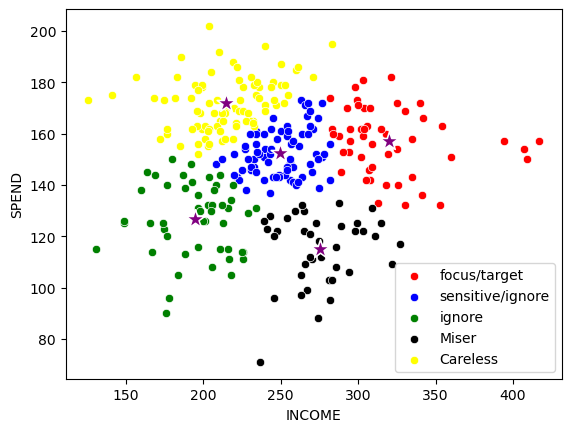

In [30]:
#Visualisation
sns.scatterplot(data=df0,x='INCOME',y='SPEND',color='red',label='focus/target')
sns.scatterplot(data=df1,x='INCOME',y='SPEND',c='blue',label='sensitive/ignore')
sns.scatterplot(data=df2,x='INCOME',y='SPEND',c='green',label='ignore')
sns.scatterplot(data=df3,x='INCOME',y='SPEND',c='black',label='Miser')
sns.scatterplot(data=df4,x='INCOME',y='SPEND',c='yellow',label='Careless')
#to show centroid of each categories
sns.scatterplot(data=centroid,x=centroid[:,0],y=centroid[:,1],c='purple',marker='*',s=200)

plt.show()

In [34]:
import pickle
file1=open('scale.pkl','wb')
pickle.dump(ss,file1)
file1.close()

In [32]:
file2=open('model.pkl','wb')
pickle.dump(km,file2)
file2.close()

In [37]:
file3=open('plot.pkl','wb')
pickle.dump(dff,file3)
file3.close()

In [40]:
file4=open('centroid.pkl','wb')
pickle.dump(centroid,file4)
file4.close()

In [33]:
a=[250,120]
a=np.array([a])
a=ss.transform(a)
km.predict(a)[0]

3